In [1]:
from meshpy import triangle, geometry
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from src.mesher import *
from src.environment import *
from src.dynamics import *
from src.refiner import MeshRefiner
from tqdm import tqdm

python(62266) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


# Example Code for using meshpy

## Building Geometry

In [2]:
builder = geometry.GeometryBuilder()

Add Circle

In [3]:
# points,facets,_,facet_markers = geometry.make_circle(.5,(1.0,1.0),marker = 1,subdivisions=200)
# builder.add_geometry(points,facets,facet_markers=facet_markers)

Add Box

In [4]:
points,facets,_,_ = geometry.make_box((0, 0), (2.0, 2.0),subdivisions=(200, 200))
builder.add_geometry(points,facets, facet_markers=1)

## Setting Mesh Info

In [5]:
info = triangle.MeshInfo()
builder.set(info)
#info.set_holes([(1.0, 1.0)]) # Sets center circle as a hole

In [6]:
# points = np.asarray([[.005,.005],[.005,1.995],[1.995,.005],[1.995,1.995]])
# points = np.vstack([np.array(info.points),points])

In [7]:
# info.set_points(points)

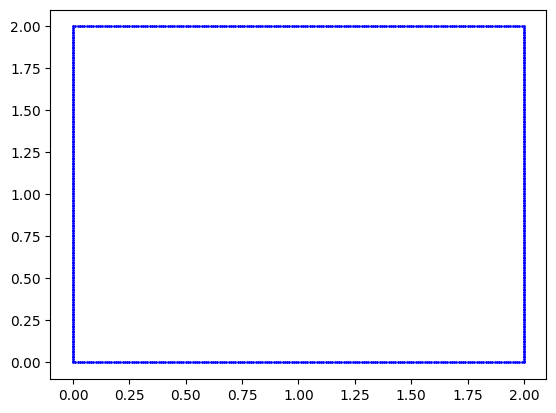

In [8]:
points = np.array(info.points)
plt.scatter(points[...,0], points[...,1], s=1, c='blue', label='Mesh Points')
#plt.axis([0,.1,0,.1])
plt.show()

Meshing

In [9]:
mesh = triangle.build(info,min_angle=33.0,
                      max_volume=.0001,
                      generate_faces=True,
                      generate_neighbor_lists=True,
                      attributes=True,
                      volume_constraints=True)

In [10]:
np.array(mesh.elements).shape

(68074, 3)

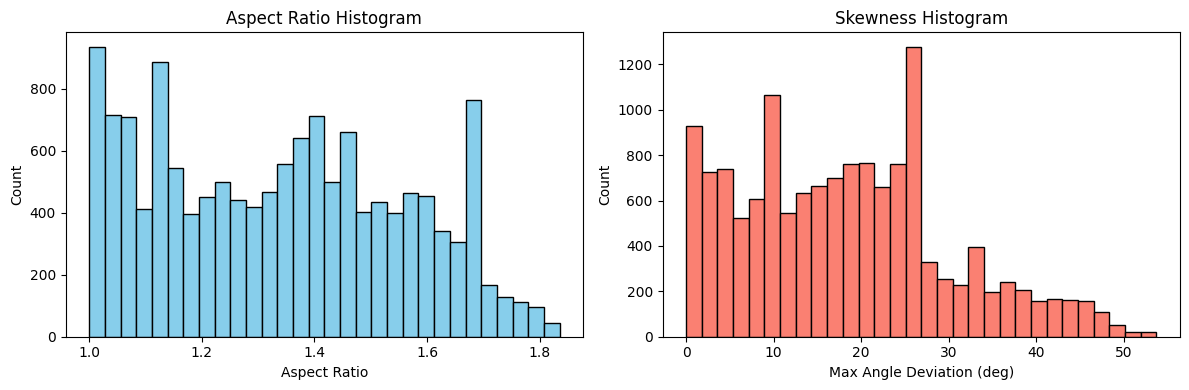

Number of cells with aspect ratio > 3.0: 0
Number of cells with skewness > 30.0°: 2176
Maximum skewness: 53.73
Iteration 1: 2176 bad triangles, max skewness: 53.73, elements: 14056, elapsed: 2.436s


KeyboardInterrupt: 

In [11]:
improver = MeshRefiner(mesh)
improver.show_mesh_quality()
mesh = improver.improve(aspect_thresh=3.0,
                        skew_thresh=30.0,
                        max_volume=0.0001,
                        move_fraction=0.25,
                        max_iter=20,
                        smoothing=True,
                        edge_flipping=False,
                        angle_smoothing=True,
                        selective_refinement=True,
                        patch_remesh=False)
improver.show_mesh_quality()

## Plotting

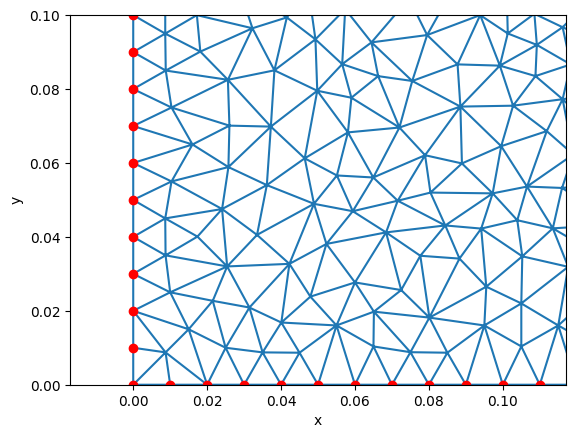

In [11]:
mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)
mesh_attr = np.array(mesh.point_markers)

import matplotlib.pyplot as plt

plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)
plt.xlabel("x")
plt.ylabel("y")
#
n = np.size(mesh_attr)
inner_nodes = [i for i in range(n) if mesh_attr[i] == 1]
outer_nodes = [i for i in range(n) if mesh_attr[i] == 3]
plt.plot(mesh_points[inner_nodes, 0], mesh_points[inner_nodes, 1], "ro")
plt.plot(mesh_points[outer_nodes, 0], mesh_points[outer_nodes, 1], "go")
plt.axis("equal")
plt.axis([0,.1,0,.1])
plt.show()

In [12]:
import sys
sys.path.append('..')
from src.mesher import *
from src.environment import *
from src.dynamics import *
mesher = Mesher()
mesher.import_meshpy(mesh)

In [13]:
mesher.calc_mesh_properties()

Calculating cell centers...
Cell centers calculated. (Elapsed: 0.096s)
Enforcing boundary face normals outward...
Boundary face normals enforced. (Elapsed: 0.203s)
Calculating face centers...
Face centers calculated. (Elapsed: 0.104s)
Calculating face normals...
Face normals calculated. (Elapsed: 0.230s)
Calculating face lengths...
Face lengths calculated. (Elapsed: 0.151s)
Calculating cell face indices and normals...
Cell face indices and normals calculated. (Elapsed: 1.046s)
Calculating cell face normal signs...
Cell face normal signs calculated. (Elapsed: 0.153s)
Calculating stencil norms (cell-to-cell/cell-to-face)...
Flipping 92467 stencil norms to align with face normals.
Stencil norms calculated. (Elapsed: 0.358s)
Calculating face cell indices...
Face cell indices calculated. (Elapsed: 0.724s)
Calculating face ghost distances...
Face ghost distances calculated. (Elapsed: 0.001s)
Calculating point cell indices and distances...
Point cell indices and distances calculated. (Elapsed

In [14]:
mesher.verify_stencil_geometry()

Mean angle (deg): 9.81, max: 41.78
Faces with angle > 30 deg: 983
Mean distance error: 0.0000, max: 0.0000
Mean distance error (% of face length): 0.00%, max: 0.00%
Faces with distance error > 1% of face length: 0
Mean face center offset: 7.9513e-04, max: 2.8313e-03
Mean face center offset (% of face length): 6.85%, max: 29.77%
Faces with face center offset > 10% of face length: 19710
Mean (cell center dist - face dist sum) as % of face length: 1.3823e+00%, max: 2.1617e+01%, min: -3.5268e-14%

Stencil distance checks:
Mean |face-normal dist - stencil-normal dist|: 8.0207e-05, max: 1.0168e-03
Mean |face-normal dist - stencil-normal dist| (% of face length): 0.69%, max: 10.81%
Faces with |face-normal dist - stencil-normal dist| > 1.0%: 46244
Faces with sign mismatch between face-normal and stencil-normal projected distances: 0


Diagonal node index: 3015, coordinates: [0.00875 0.00875]
Cell indices on diagonal node 3015: [1, 2, 8, 198, 5228, 5229]
Face 0: Center=[0.005 0.   ], Normal=[-0. -1.], Distances=[0.00291667 0.00291667], Point Plus=[ 0.005      -0.00291667], Point Minus=[0.005      0.00291667]
Face 1: Center=[0.009375 0.004375], Normal=[0.98994949 0.14142136], Distances=[0.00329983 0.00329983], Point Plus=[0.01264167 0.00484167], Point Minus=[0.00610833 0.00390833]
Face 2: Center=[0.004375 0.004375], Normal=[ 0.70710678 -0.70710678], Distances=[0.00235702 0.00235702], Point Plus=[0.00604167 0.00270833], Point Minus=[0.00270833 0.00604167]
Face 0: Center=[0.004375 0.009375], Normal=[-0.14142136 -0.98994949], Distances=[0.00329983 0.00329983], Point Plus=[0.00390833 0.00610833], Point Minus=[0.00484167 0.01264167]
Face 1: Center=[0.    0.005], Normal=[-1.  0.], Distances=[0.00291667 0.00291667], Point Plus=[-0.00291667  0.005     ], Point Minus=[0.00291667 0.005     ]
Face 2: Center=[0.004375 0.004375], 

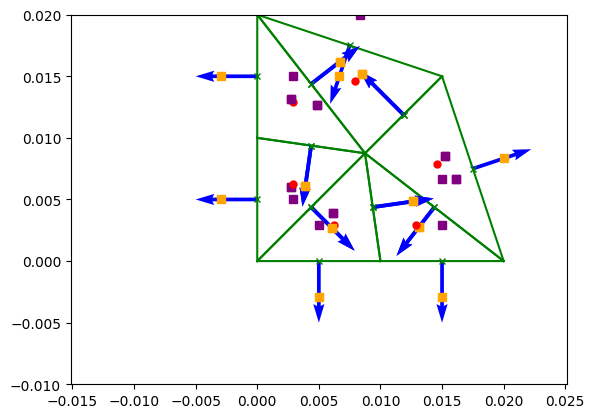

In [15]:
xy = np.asarray(mesher.points)
x = xy[:,0]
y = xy[:,1]
tri = np.asarray(mesher.cells)

# Find the node at (0, 0)
corner_node = np.where((mesher.points[:, 0] == 0) & (mesher.points[:, 1] == 0))[0][0]
corner_coords = mesher.points[corner_node]
# Find all nodes with both coordinates greater than corner_coords
candidates = np.where((mesher.points[:, 0] > corner_coords[0]) & (mesher.points[:, 1] > corner_coords[1]))[0]
if len(candidates) > 0:
    # Find the candidate with minimal distance to (0,0)
    dists = np.linalg.norm(mesher.points[candidates] - corner_coords, axis=1)
    diagonal_node = candidates[np.argmin(dists)]
    print(f"Diagonal node index: {diagonal_node}, coordinates: {mesher.points[diagonal_node]}")
else:
    print("No diagonal node found.")
    diagonal_node = None

if diagonal_node is not None:
    # Find all cells that include the diagonal node
    cells_on_diagonal_node = [i for i, cell in enumerate(mesher.cells) if diagonal_node in cell]
    print(f"Cell indices on diagonal node {diagonal_node}: {cells_on_diagonal_node}")
else:
    cells_on_diagonal_node = []

for cell_index in cells_on_diagonal_node:
    face_centers = mesher.face_centers[mesher.cell_face_indices[cell_index]]
    normals = mesher.face_normals[mesher.cell_face_indices[cell_index]]
    for i, (fc, nrm, dist) in enumerate(zip(face_centers, normals, mesher.face_cell_center_distances[mesher.cell_face_indices[cell_index]])):
        # Now, normal always points outward from the cell
        pt_plus = fc + nrm * dist[1]  # outward from cell center to face
        pt_minus = fc - nrm * dist[0] # inward toward cell center
        print(f"Face {i}: Center={fc}, Normal={nrm}, Distances={dist}, Point Plus={pt_plus}, Point Minus={pt_minus}")
        plt.plot([pt_plus[0]], [pt_plus[1]], marker='s', color='orange', markersize=6, label='Outward Normal' if i == 0 else "")
        plt.plot([pt_minus[0]], [pt_minus[1]], marker='s', color='purple', markersize=6, label='Inward Normal' if i == 0 else "")

    plt.triplot(x, y, tri[cell_index:cell_index + 1], color="g")
    plt.plot(mesher.cell_centers[cell_index, 0], mesher.cell_centers[cell_index, 1], marker='o', color='red', markersize=5, label='Cell Center')
    plt.plot(face_centers[:, 0], face_centers[:, 1], marker='x', color='green', markersize=5, label='Face Center', linestyle='None')
    plt.quiver(face_centers[:, 0], face_centers[:, 1], normals[:, 0], normals[:, 1], color='blue', angles='xy', scale_units='xy', scale=200, label='Face Normals')
plt.axis('equal')
plt.axis([-.01, .02, -.01, .02])
plt.show()

In [16]:
# Given physical parameters
Re = 100            # Reynolds number
nu = 0.1     # physical kinematic viscosity
L = 100             # domain length (physical units)
dx = 1           # spatial step (physical units)
dt = .25            # time step (physical units)

# Speed of sound squared for D2Q9 lattice
c_s_sq = 1.0 / 3.0

# Convert to lattice units
U_lattice = Re * nu / L

# Compute relaxation time tau
Tau = nu / c_s_sq + 0.5

# Print results
print(f"Lid velocity (lattice units): {U_lattice:.5f}")
print(f"Relaxation time tau: {Tau:.5f}")
U_lid = U_lattice
dynamics = D2Q9(tau=Tau,delta_t = dt)

Lid velocity (lattice units): 0.10000
Relaxation time tau: 0.80000


In [17]:
cells,faces,nodes = mesher.to_env(dynamics,flux_method='lax_wendroff')
env = Environment(cells,faces,nodes)
env.init()

/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher.py:417: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  faces.n = jnp.array(self.face_normals,dtype=jnp.float64)
/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher.py:418: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  faces.L = jnp.array(self.face_lengths,dtype=jnp.float64)[...,jnp.newaxis] * 50
/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher

In [50]:
for i in tqdm(range(100000)):
    env = env.step()

 55%|█████▍    | 54846/100000 [06:10<05:05, 147.86it/s]


KeyboardInterrupt: 

In [51]:
env = env.step()

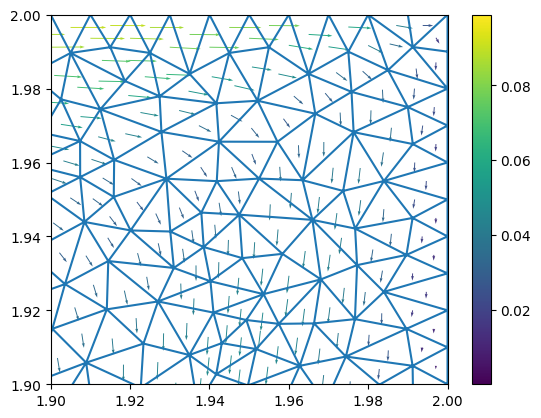

In [52]:
xy = np.array(mesher.cell_centers)
x = xy[:,0]
y = xy[:,1]
vel = env.cells.vel 
mag = np.sqrt(np.sum(vel**2,axis=-1))
plt.quiver(x,y,vel[:,0],vel[:,1],mag,scale=1)
xy = np.asarray(mesher.points)
x = xy[:,0]
y = xy[:,1]
tri = np.asarray(mesher.cells)
plt.triplot(x,y,tri)
plt.axis([1.9,2,1.9,2])
plt.colorbar()
plt.show()

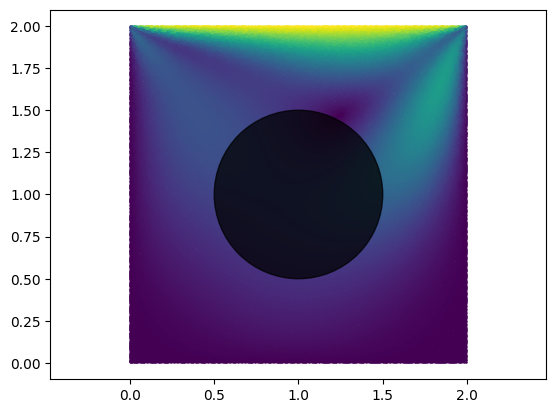

In [53]:
xy = np.array(mesher.cell_centers)
x = xy[:,0]
y = xy[:,1]
vel = env.cells.vel
mag = np.sqrt(np.sum(vel**2,axis=-1))
plt.scatter(x, y, c=mag, cmap='viridis', vmin=0, vmax=jnp.max(mag), s=1, marker='o')
plt.gca().add_patch(plt.Circle((1.0, 1.0), 0.5, color='black', alpha=0.75, label='Circle Hole'))
plt.axis('equal')
plt.show()

In [54]:
from scipy.interpolate import LinearNDInterpolator
interp = LinearNDInterpolator(xy, vel)

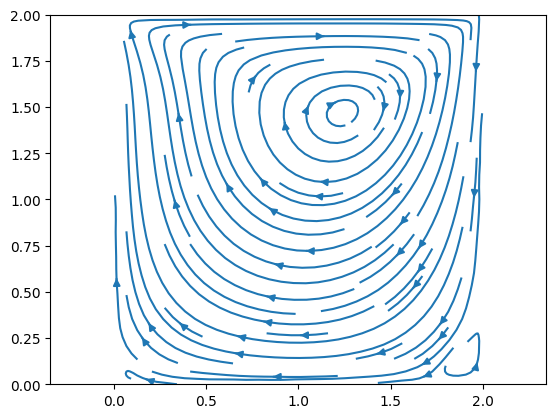

In [55]:
x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)
x,y = np.meshgrid(x, y)
vel = interp(x,y)
plt.streamplot(x, y, vel[:,:,0], vel[:,:,1],density=1)
plt.axis('equal')
# plt.gca().add_patch(plt.Circle((1.0, 1.0), 0.5, color='black', alpha=0.75, label='Circle Hole'))
plt.show()

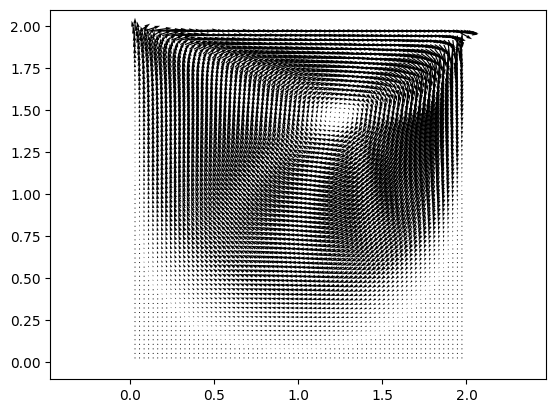

In [56]:
x = np.linspace(0, 2, 75)
y = np.linspace(0, 2, 75)
x,y = np.meshgrid(x, y)
vel = interp(x,y)
plt.quiver(x,y,vel[:,:,0],vel[:,:,1],scale=1)
plt.axis('equal')
# plt.gca().add_patch(plt.Circle((1.0, 1.0), 0.5, color='black', alpha=0.75, label='Circle Hole'))

plt.show()

In [57]:
from scipy.io import loadmat
ref_data = loadmat('../ref/ldc_Re100.mat')
refu = ref_data['u'].T[...,jnp.newaxis]
refv = ref_data['v'].T[...,jnp.newaxis]
refx = ref_data['x'].squeeze()
refy = ref_data['y'].squeeze()
# x,y = jnp.meshgrid(x,y)
# x = jnp.expand_dims(x.flatten(),axis=-1)
# y = jnp.expand_dims(y.flatten(),axis=-1)
# xy = jnp.concatenate((x,y),axis=-1)
sol = jnp.concatenate((refu,refv),axis=-1)
solx = sol[128,:,1]
soly = sol[:,128,0]

In [58]:
x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)
outx = interp(x,np.ones_like(x))[...,1]/U_lid
outy = interp(np.ones_like(y),y)[...,0]/U_lid

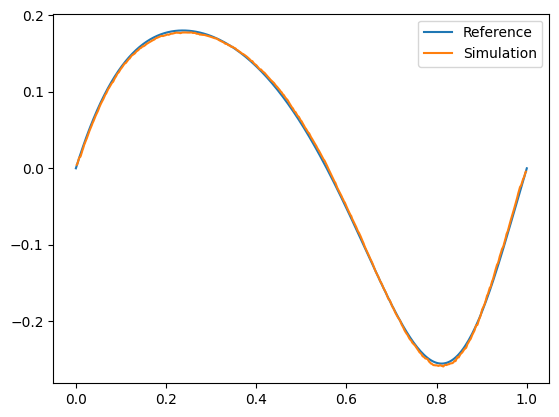

In [61]:
plt.plot(refy,solx)
plt.plot(x/2,outx,)
plt.legend(['Reference','Simulation'])
plt.show()

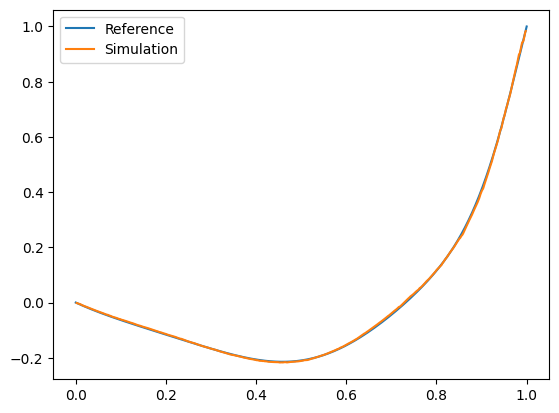

In [62]:
plt.plot(refy,soly)
plt.plot(y/2,outy,)
plt.legend(['Reference','Simulation'])
plt.show()

# Tri mesh test


In [2]:
from scipy.io import loadmat
data = loadmat("IRTmesh.mat")

In [3]:
mesher = Mesher()
mesher.points = np.array([data["NODE"][0,i][2][0][:,0] for i in range(data["NODE"].shape[1])], dtype=np.float64)
mesher.cells = np.array([[data["CELL"][0,i][j][0][0][0] for j in range(6,9)] for i in range(data["CELL"].shape[1])],dtype=np.int32)-1
mesher.faces = np.array([[data["FACE"][0,i][j][0][0][0] for j in range(7,9)] for i in range(data["FACE"].shape[1])],dtype=np.int32)-1
mesher.point_markers = np.zeros_like(mesher.points[:,0])

mesher.enforce_ccw()

print(mesher.points.shape, mesher.cells.shape, mesher.faces.shape, mesher.point_markers.shape)

mesher.calc_mesh_properties()

(20201, 2) (40000, 3) (60200, 2) (20201,)
Calculating cell centers...
Cell centers calculated. (Elapsed: 0.055s)
Enforcing boundary face normals outward...
Boundary face normals enforced. (Elapsed: 0.091s)
Calculating face centers...
Face centers calculated. (Elapsed: 0.059s)
Calculating face normals...
Face normals calculated. (Elapsed: 0.139s)
Calculating face lengths...
Face lengths calculated. (Elapsed: 0.083s)
Calculating cell face indices and normals...
Cell face indices and normals calculated. (Elapsed: 0.635s)
Calculating cell face normal signs...
Cell face normal signs calculated. (Elapsed: 0.081s)
Calculating stencil norms (cell-to-cell/cell-to-face)...
Flipping 39900 stencil norms to align with face normals.
Stencil norms calculated. (Elapsed: 0.228s)
Calculating face cell indices...
Face cell indices calculated. (Elapsed: 0.426s)
Calculating face ghost distances...
Face ghost distances calculated. (Elapsed: 0.001s)
Calculating point cell indices and distances...
Point cell 

In [4]:
mesher.verify_stencil_geometry()

Mean angle (deg): 0.00, max: 0.00
Faces with angle > 30 deg: 0
Mean distance error: 0.0000, max: 0.0000
Mean distance error (% of face length): 0.00%, max: 0.00%
Faces with distance error > 1% of face length: 0
Mean face center offset: 1.5766e-03, max: 2.3570e-03
Mean face center offset (% of face length): 11.15%, max: 16.67%
Faces with face center offset > 10% of face length: 40000
Mean (cell center dist - face dist sum) as % of face length: 5.4337e-16%, max: 1.2266e-14%, min: -2.4533e-14%

Stencil distance checks:
Mean |face-normal dist - stencil-normal dist|: 1.7575e-19, max: 1.7347e-18
Mean |face-normal dist - stencil-normal dist| (% of face length): 0.00%, max: 0.00%
Faces with |face-normal dist - stencil-normal dist| > 1.0%: 0
Faces with sign mismatch between face-normal and stencil-normal projected distances: 0


In [32]:
# Given physical parameters
Re = 100            # Reynolds number
nu = 0.1     # physical kinematic viscosity
L = 100             # domain length (physical units)
dx = 1           # spatial step (physical units)
dt = 0.1            # time step (physical units)

# Speed of sound squared for D2Q9 lattice
c_s_sq = 1.0 / 3.0

# Convert to lattice units
U_lattice = Re * nu / L

# Compute relaxation time tau
Tau = nu / c_s_sq + 0.5

# Print results
print(f"Lid velocity (lattice units): {U_lattice:.5f}")
print(f"Relaxation time tau: {Tau:.5f}")
U_lid = U_lattice
dynamics = D2Q9(tau=Tau,delta_t = dt)

Lid velocity (lattice units): 0.10000
Relaxation time tau: 0.80000


Diagonal face index: 1, nodes: [9801    0], other node: 9801
Cell indices on node 9801: [0, 1, 2, 3]
Face 0: Center=[0.015 0.015], Normal=[-0.70710678  0.70710678], Distances=[0.00471405 0.00471405], Point Plus=[0.01166667 0.01833333], Point Minus=[0.01833333 0.01166667]
Face 1: Center=[0.01 0.02], Normal=[-0.  1.], Distances=[0.00333333 0.00333333], Point Plus=[0.01       0.02333333], Point Minus=[0.01       0.01666667]
Face 2: Center=[0.005 0.015], Normal=[-0.70710678 -0.70710678], Distances=[0.00471405 0.00471405], Point Plus=[0.00166667 0.01166667], Point Minus=[0.00833333 0.01833333]
Face 0: Center=[0.015 0.005], Normal=[0.70710678 0.70710678], Distances=[0.00471405 0.00471405], Point Plus=[0.01833333 0.00833333], Point Minus=[0.01166667 0.00166667]
Face 1: Center=[0.02 0.01], Normal=[-1.  0.], Distances=[0.00333333 0.00333333], Point Plus=[0.01666667 0.01      ], Point Minus=[0.02333333 0.01      ]
Face 2: Center=[0.015 0.015], Normal=[-0.70710678  0.70710678], Distances=[0.00471

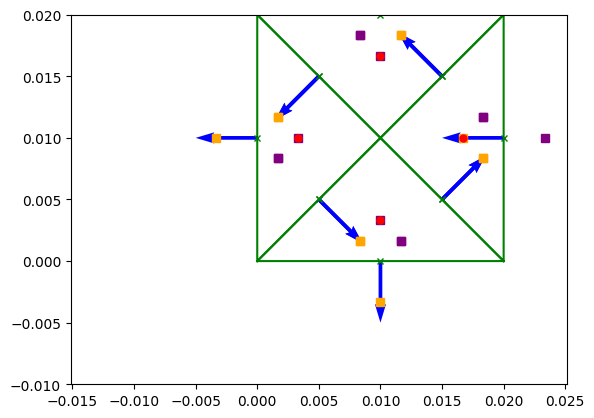

In [33]:
xy = np.asarray(mesher.points)
x = xy[:,0]
y = xy[:,1]
tri = np.asarray(mesher.cells)
# Find the diagonal face attached to corner node 0
corner_node = 0
# Find all faces that include node 0
faces_with_node0 = [i for i, face in enumerate(mesher.faces) if corner_node in face]
# For each such face, check if it is a diagonal (not an edge of the box)
# Here, since the box is axis-aligned, diagonal faces will not have both nodes as box corners
# We'll just pick the first face for demonstration
if faces_with_node0:
    face_idx = faces_with_node0[0]
    face_nodes = mesher.faces[face_idx]
    # The other node attached to the face (not node 0)
    other_node = face_nodes[0] if face_nodes[1] == corner_node else face_nodes[1]
    print(f"Diagonal face index: {face_idx}, nodes: {face_nodes}, other node: {other_node}")

    # Find all cell indices that include this other node
    cells_on_other_node = [i for i, cell in enumerate(mesher.cells) if other_node in cell]
    print(f"Cell indices on node {other_node}: {cells_on_other_node}")
else:
    print("No face found attached to node 0.")
for cell_index in cells_on_other_node:
    face_centers = mesher.face_centers[mesher.cell_face_indices[cell_index]]
    normals = mesher.face_normals[mesher.cell_face_indices[cell_index]] 

    for i, (fc, nrm, dist) in enumerate(zip(face_centers, normals, mesher.face_cell_center_distances[mesher.cell_face_indices[cell_index]])):
        # Point along the normal direction
        pt_plus = fc + nrm * dist[1]
        # Point in the opposite direction
        pt_minus = fc - nrm * dist[0]
        print(f"Face {i}: Center={fc}, Normal={nrm}, Distances={dist}, Point Plus={pt_plus}, Point Minus={pt_minus}")
        plt.plot([pt_plus[0]], [pt_plus[1]], marker='s', color='orange', markersize=6, label='Along Normal' if i == 0 else "")
        plt.plot([pt_minus[0]], [pt_minus[1]], marker='s', color='purple', markersize=6, label='Opposite Normal' if i == 0 else "")

    plt.triplot(x,y,tri[cell_index:cell_index +1],color="g")
    plt.plot(mesher.cell_centers[cell_index,0],mesher.cell_centers[cell_index,1], marker='o', color='red', markersize=5, label='Cell Center')
    plt.plot(face_centers[:,0], face_centers[:,1], marker='x', color='green', markersize=5, label='Face Center',linestyle='None')
    #normals = normals*mesher.cell_face_normal_signs[cell_index,:,jnp.newaxis]
    plt.quiver(face_centers[:,0], face_centers[:,1],normals[:,0], normals[:,1], color='blue', angles='xy', scale_units='xy', scale=200, label='Face Normals')
plt.axis('equal')
plt.axis([-.01, .02, -.01, .02])
#plt.axis([-1,-.9,-1,-.9])
plt.show()

[[0.01 0.01]
 [0.02 0.02]
 [0.   0.02]]
[[0.01 0.01]
 [0.   0.02]]


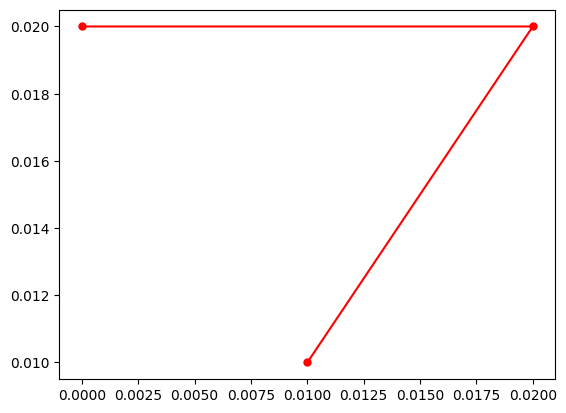

In [34]:
points = mesher.points[mesher.cells[0]]
print(points)
plt.plot(points[:,0], points[:,1], marker='o', color='red', markersize=5, label='Cell Points')
print(mesher.points[mesher.faces[mesher.cell_face_indices[0,2]]])

In [35]:
cells,faces,nodes = mesher.to_env(dynamics,flux_method="lax_wendroff")
env = Environment(cells,faces,nodes)
env.init()

/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher.py:417: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  faces.n = jnp.array(self.face_normals,dtype=jnp.float64)
/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher.py:418: UserWarning: Explicitly requested dtype <class 'jax.numpy.float64'> requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  faces.L = jnp.array(self.face_lengths,dtype=jnp.float64)[...,jnp.newaxis] * 50
/Users/sungjepark/Documents/GitHub/FVDBMSolver/tests/../src/mesher

In [60]:
for i in tqdm(range(100000)):
    env = env.step()

 19%|█▊        | 18578/100000 [00:52<03:50, 353.83it/s]


KeyboardInterrupt: 

In [37]:
env = env.step()

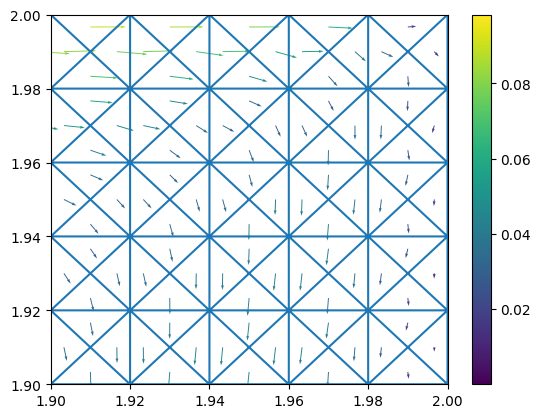

In [61]:
xy = np.array([data["CELL"][0,i][4][0][:,0] for i in range(data["CELL"].size)])
x = xy[:,0]
y = xy[:,1]
vel = env.cells.vel 
mag = np.sqrt(np.sum(vel**2,axis=-1))
plt.quiver(x,y,vel[:,0],vel[:,1],mag,scale=1)
xy = np.asarray([data["NODE"][0,i][2,0][:,0] for i in range(data["NODE"].size)])
x = xy[:,0]
y = xy[:,1]
tri = np.asarray([data["CELL"][0,i][6:9][:,0] for i in range(data["CELL"].size)])-1
plt.triplot(x,y,tri)
plt.axis([1.9,2,1.9,2])
plt.colorbar()
plt.show()

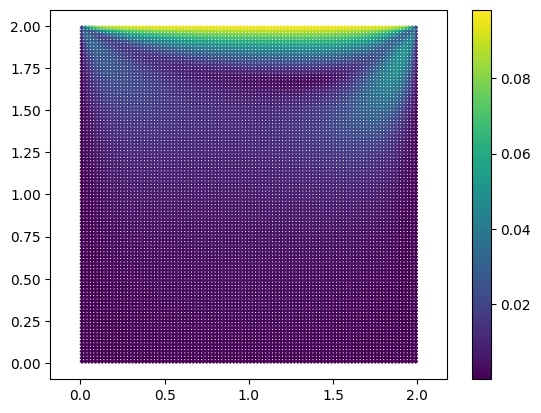

In [62]:
xy = np.array([data["CELL"][0,i][4][0][:,0] for i in range(data["CELL"].size)])
x = xy[:,0]
y = xy[:,1]
vel = env.cells.vel
mag = np.sqrt(np.sum(vel**2,axis=-1))
plt.scatter(x,y,c=mag,cmap='viridis',s=.5)
plt.axis('equal')
plt.colorbar()
plt.show()